 genrate datapaths with labels into data into dataframe

In [3]:
import os
import numpy as np
import itertools
import pandas as pd
from PIL import Image

Data preprocessing

In [4]:
train_data_dir = r"G:\My Drive\Brain tumor dataset 2023\Training"
filepaths = []
labels = []

folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

train_images= pd.concat([Fseries, Lseries], axis=1)


In [5]:
train_images.head(5)

,filepaths,labels
0,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
1,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
2,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
3,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
4,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma


In [6]:
test_data_dir =r"G:\My Drive\Brain tumor dataset 2023\Testing"
filepaths = []
labels = []

folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
        
# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

test_images= pd.concat([Fseries, Lseries], axis=1)


In [7]:
test_images.head()

,filepaths,labels
0,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
1,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
2,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
3,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma
4,G:\My Drive\Brain tumor dataset 2023\Training\...,glioma


In [ ]:
import os
import numpy as np
import itertools
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data directories
train_data_dir = r"G:\My Drive\Brain tumor dataset 2023\Training"
test_data_dir = r"G:\My Drive\Brain tumor dataset 2023\Testing"

# Function to load file paths and labels
def load_data(data_dir, subset_size):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist[:subset_size]:  # Select subset of data
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels

train_filepaths, train_labels = load_data(train_data_dir, 4000)  # Select 4000 images for training
test_filepaths, test_labels = load_data(test_data_dir, 4000)    # Select 4000 images for testing

train_images = pd.DataFrame({'filepaths': train_filepaths, 'labels': train_labels})
test_images = pd.DataFrame({'filepaths': test_filepaths, 'labels': test_labels})

def min_max_scaling(img):
    scaler = MinMaxScaler()
    scaled_img = scaler.fit_transform(img)
    return scaled_img

def preprocess_image(filepath):
    img = Image.open(filepath)
    img = img.resize((224, 224))
    img_array = np.array(img)
    scaled_img = min_max_scaling(img_array)  
    return scaled_img

train_images['filepaths'] = train_images['filepaths'].apply(preprocess_image)
test_images['filepaths'] = test_images['filepaths'].apply(preprocess_image)

batch_size = 17
img_size = (224, 224)

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Flow training and testing images in batches using generators
train_generator = train_datagen.flow_from_dataframe(
    train_images,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_generator = test_datagen.flow_from_dataframe(
    test_images,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

# Rest of your model training and evaluation code...


In [ ]:
    batch_size=batch_size
)

test_generator = test_datagen.flow_from_dataframe(
    test_images,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

# Rest of your model training and evaluation code...


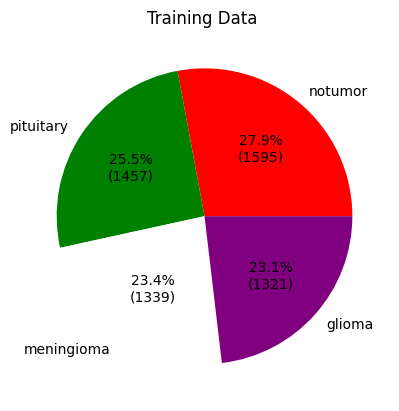

In [8]:
import matplotlib.pyplot as plt

data_balance = train_images['labels'].value_counts()

def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct * total / 100.0))
    return "{:.1f}%\n({:d})".format(pct, val)

# Create pie chart for data balance
plt.pie(data_balance, labels=data_balance.index, autopct=custom_autopct, colors=["red","green","white","purple"])
plt.title("Training Data ")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

c:\Users\Ganeshvivek Mannam\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


splitting the test data to test and validation data

In [10]:
valid_data, test_data = train_test_split(test_images, test_size=0.5, random_state=42)

image geneartion from the file _paths with augmentation 

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split

batch_size = 17
img_size = (224, 224)

# Data generators without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(
    train_images,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Flow validation images in batches without data augmentation
valid_generator = valid_datagen.flow_from_dataframe(
    valid_data,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

# Flow test images in batches without data augmentation
test_generator = test_datagen.flow_from_dataframe(
    test_data,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 5712 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.
Found 2856 validated image filenames belonging to 4 classes.


train data 

In [13]:
import matplotlib.pyplot as plt

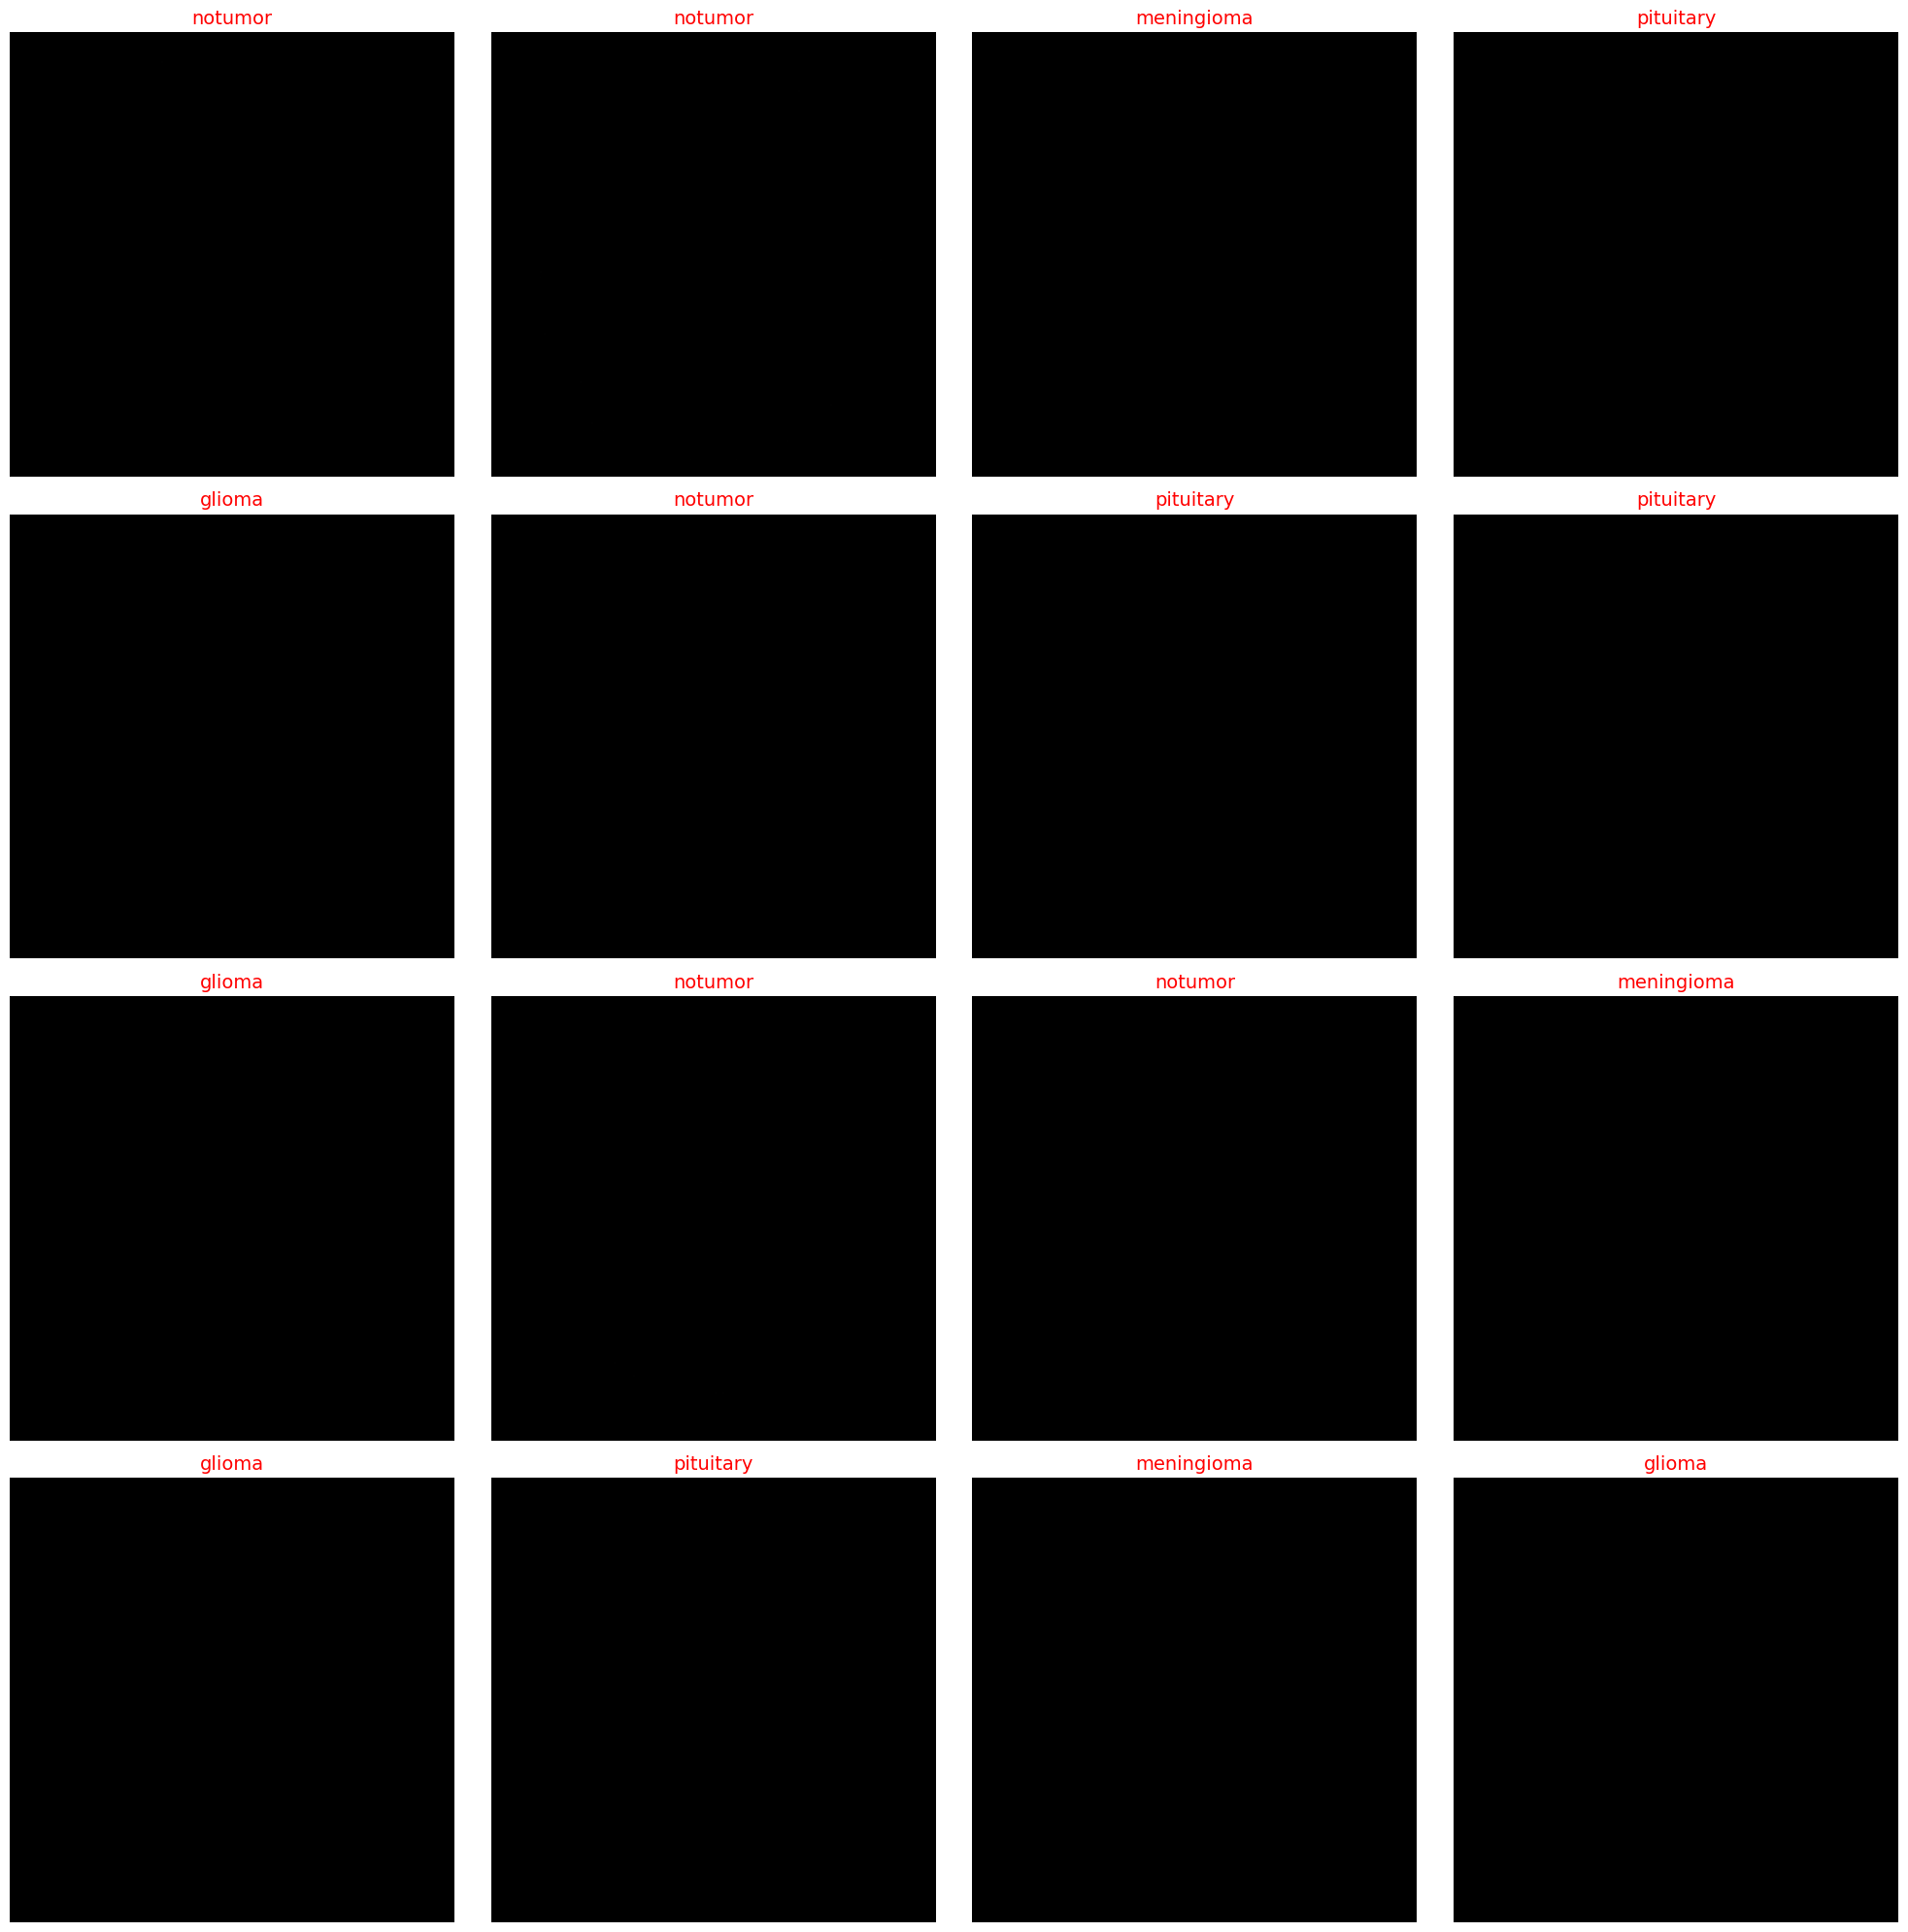

In [14]:
samp_dict = train_generator.class_indices  
classes = list(samp_dict.keys())  
images, labels = next(train_generator) 

plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i+1)
    image = images[i] / 255  
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color='red', fontsize=14)
    plt.axis('off')
plt.tight_layout()
plt.show()

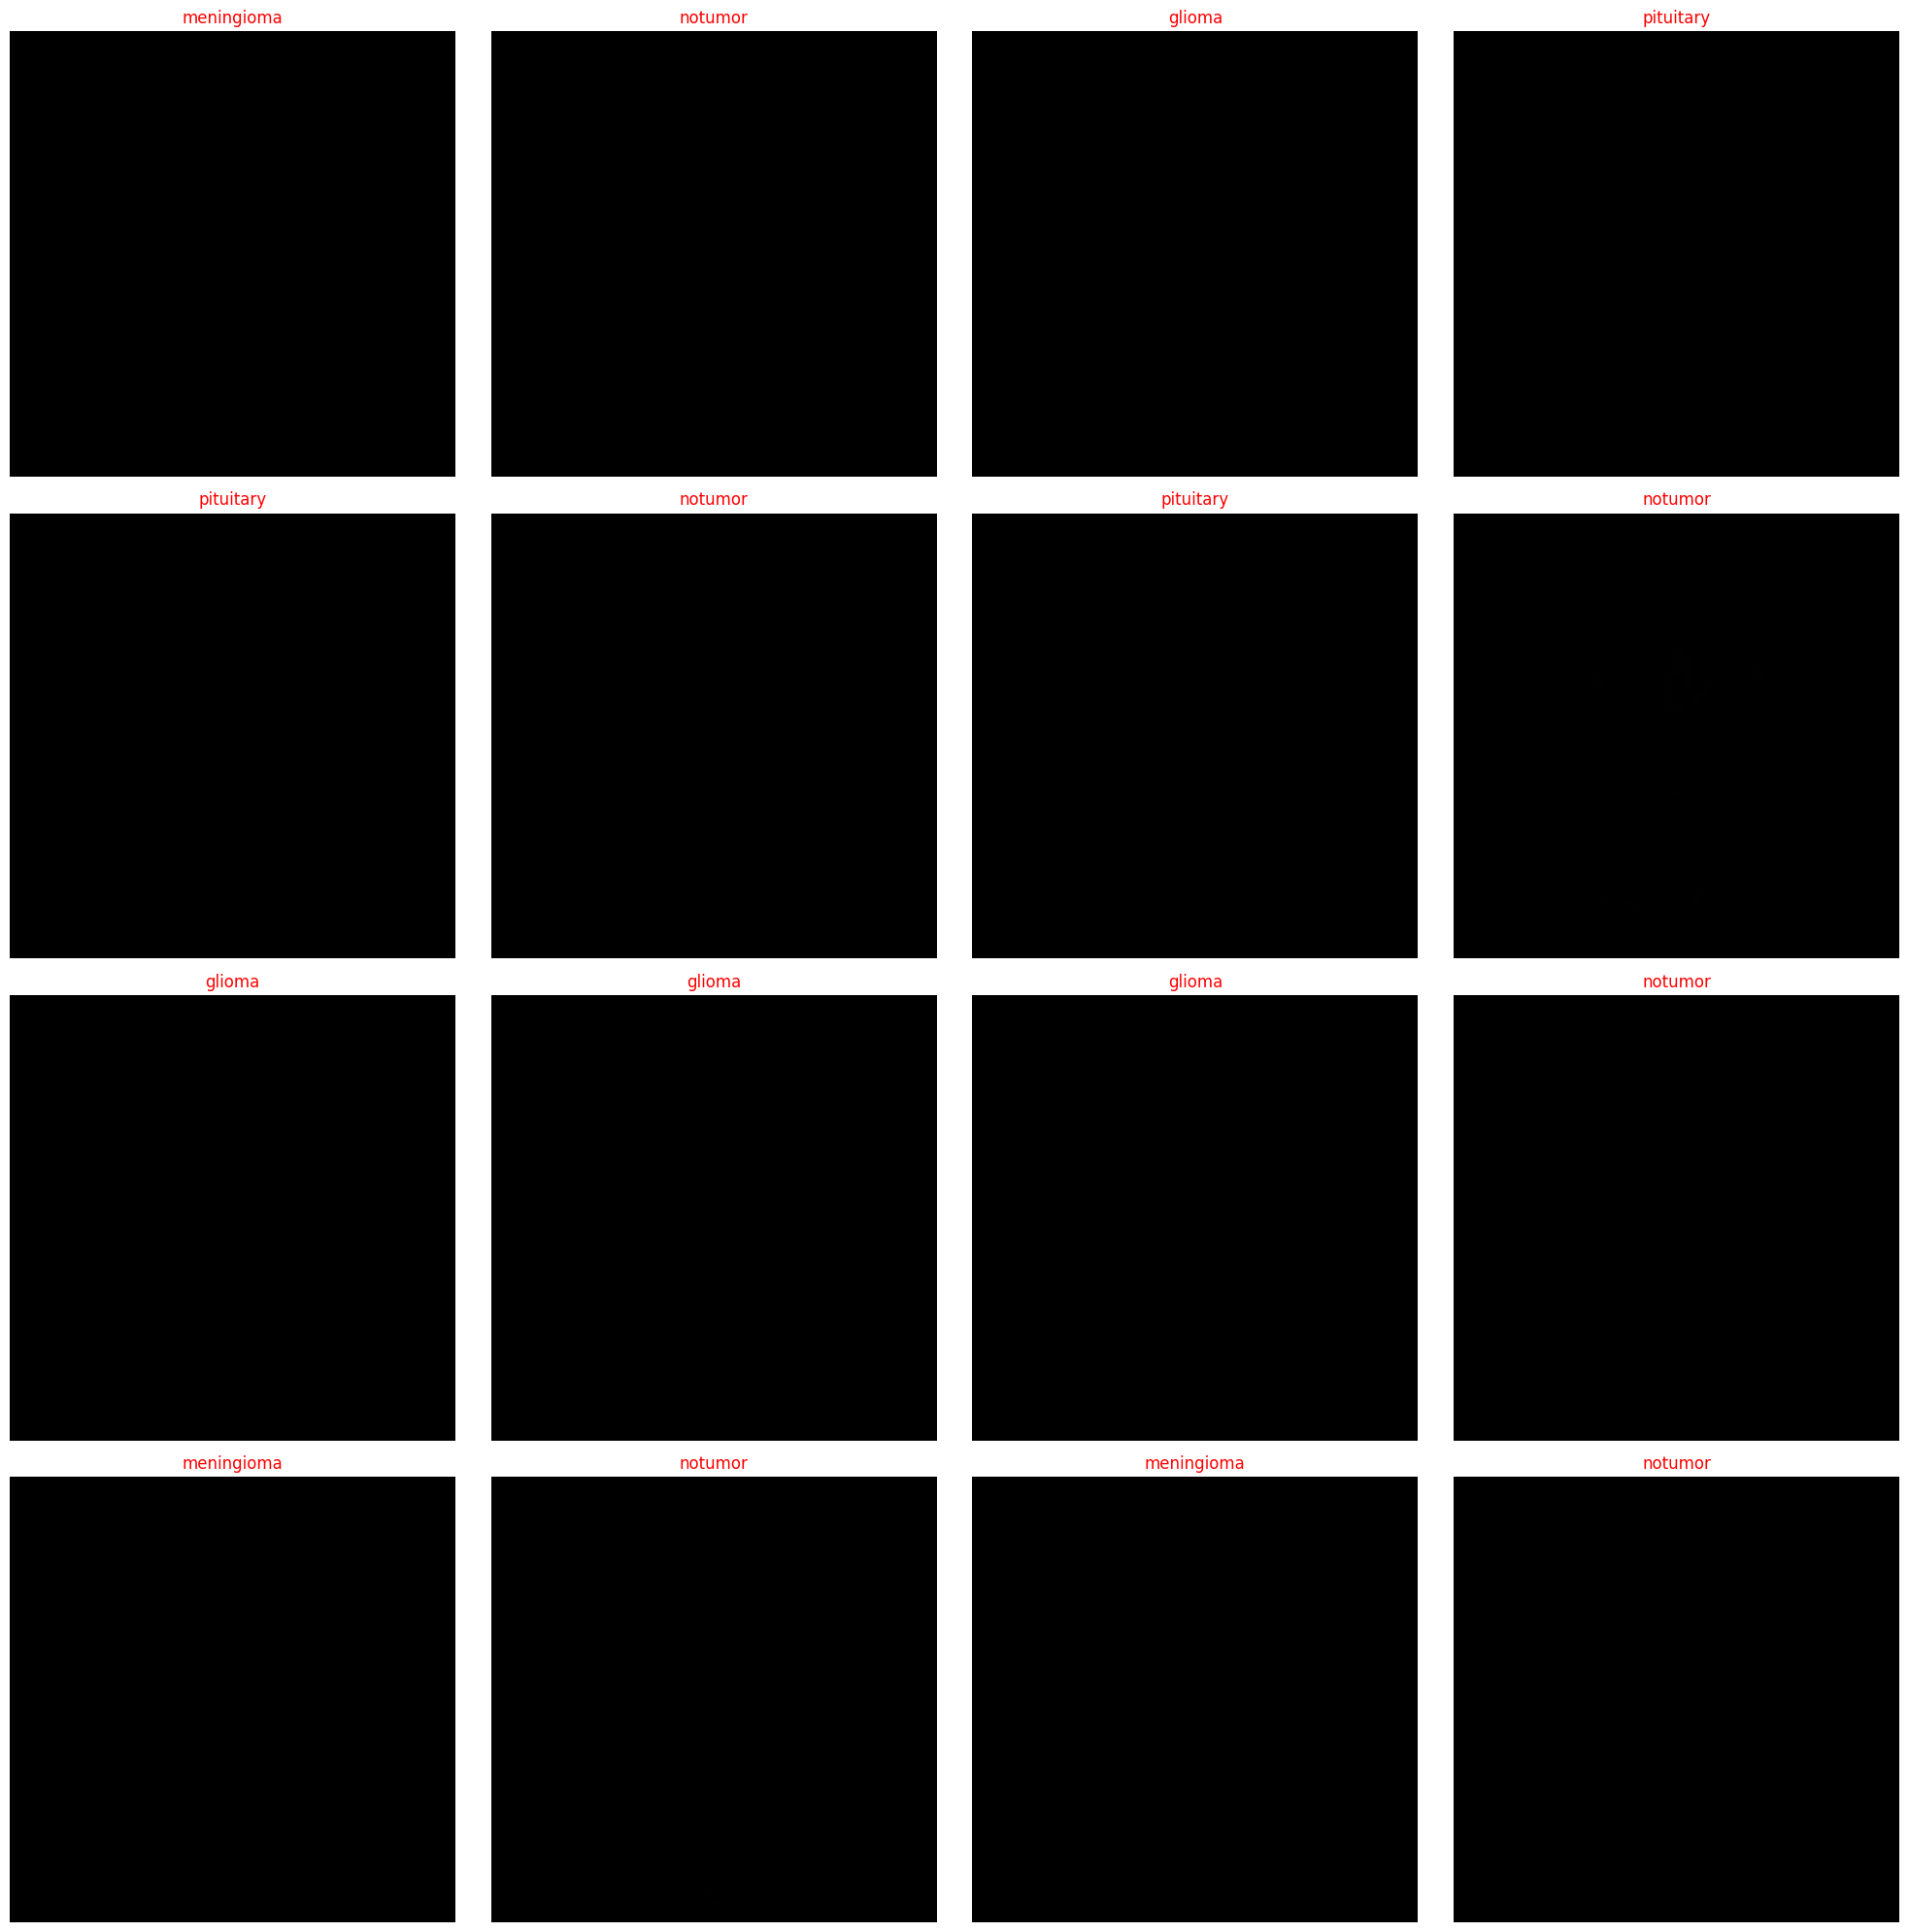

In [15]:
samp_dict = test_generator.class_indices  
classes = list(samp_dict.keys())  
images, labels = next(test_generator) 

plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i+1)
    image = images[i] / 255  
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color='red', fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential

Creating a model

In [17]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adamax
from sklearn.decomposition import PCA  # Import PCA from sklearn

# Define image parameters
img_size = (224, 224)
img_shape = (img_size[0], img_size[1], 3)
class_count = len(list(train_generator.class_indices.keys()))

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout layer
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout layer
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Dropout layer
    Dense(class_count, activation="softmax")
])


In [19]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     73856     
                                                        

Training the model

In [20]:
history=model.fit(train_generator,epochs=10,verbose=1,validation_data=valid_generator,shuffle=False)

Epoch 1/10


336/336 [==============================] - 1102s 3s/step - loss: 0.7825 - accuracy: 0.6924 - val_loss: 0.4842 - val_accuracy: 0.7861
Epoch 2/10
336/336 [==============================] - 874s 3s/step - loss: 0.4365 - accuracy: 0.8426 - val_loss: 0.3038 - val_accuracy: 0.9030
Epoch 3/10
336/336 [==============================] - 932s 3s/step - loss: 0.3105 - accuracy: 0.8909 - val_loss: 0.1763 - val_accuracy: 0.9363
Epoch 4/10
336/336 [==============================] - 817s 2s/step - loss: 0.2247 - accuracy: 0.9203 - val_loss: 0.1222 - val_accuracy: 0.9566
Epoch 5/10
336/336 [==============================] - 727s 2s/step - loss: 0.1737 - accuracy: 0.9371 - val_loss: 0.0875 - val_accuracy: 0.9692
Epoch 6/10
336/336 [==============================] - 617s 2s/step - loss: 0.1416 - accuracy: 0.9499 - val_loss: 0.0673 - val_accuracy: 0.9804
Epoch 7/10
336/336 [==============================] - 617s 2s/step - loss: 0.1101 - accuracy: 0.9625 - val_loss: 0.0426 - val_accuracy: 0.9

In [ ]:
# Accessing training and validation metrics from history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Calculating best epoch based on lowest validation loss and highest validation accuracy
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Display  model performance

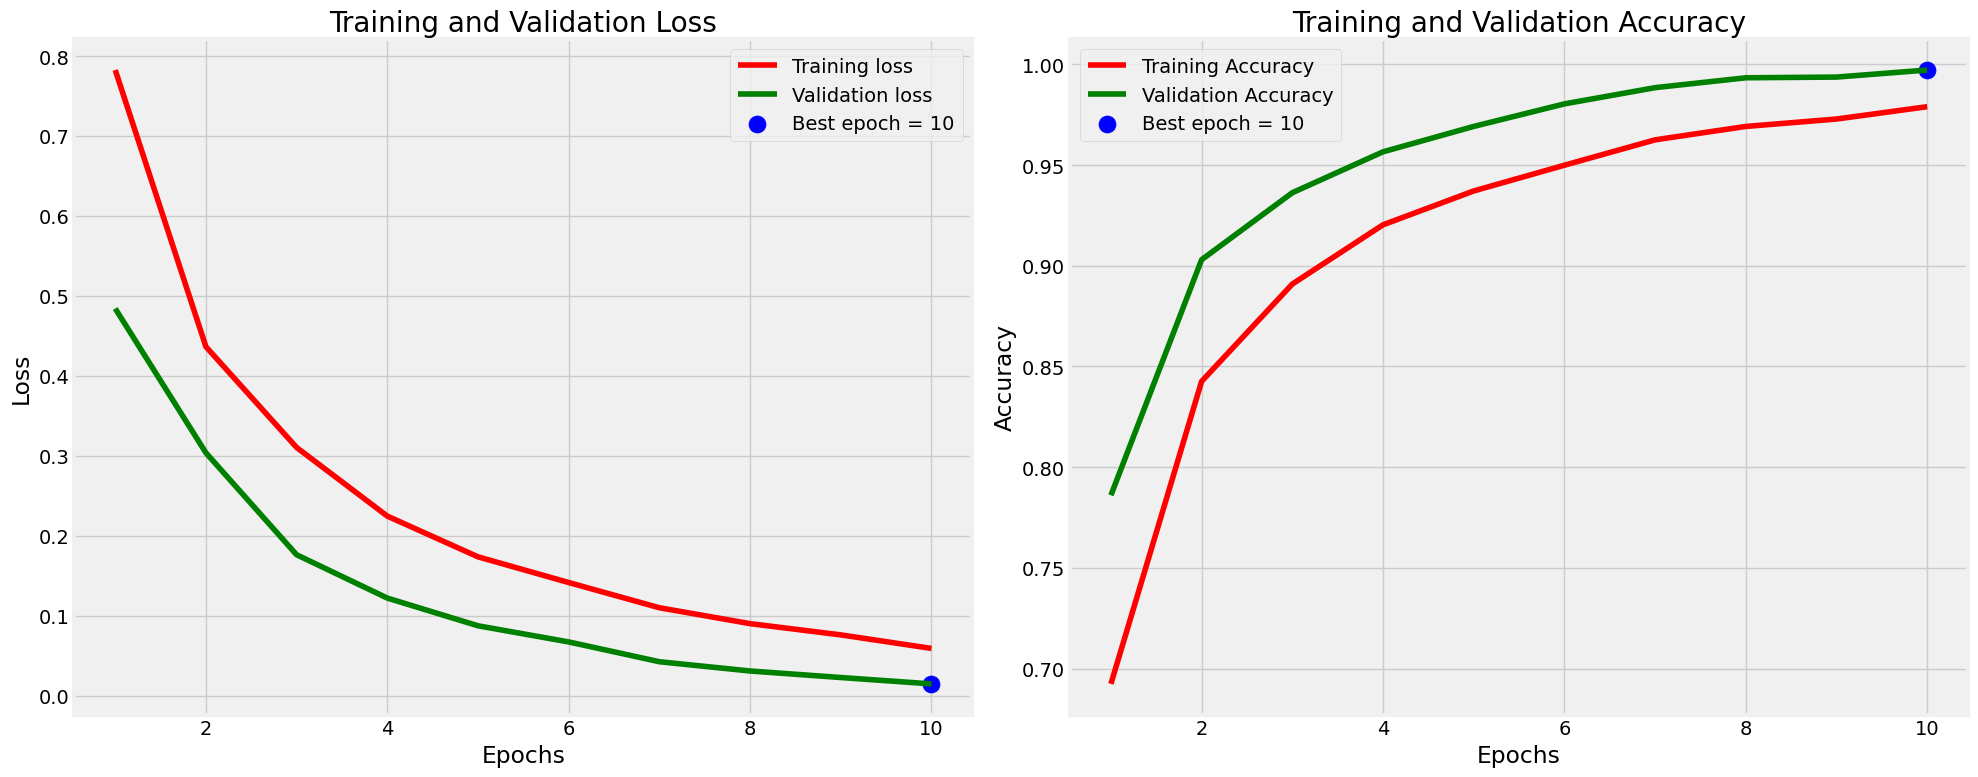

In [21]:
# Plotting training and validation loss
Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {index_loss + 1}'
acc_label = f'Best epoch = {index_acc + 1}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating model

In [22]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(valid_generator, verbose= 1)
test_score = model.evaluate(test_generator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

168/168 [==============================] - 119s 706ms/step - loss: 0.0185 - accuracy: 0.9944
Train Loss:  0.01666896417737007
Train Accuracy:  0.9957982897758484
--------------------
Validation Loss:  0.014877249486744404
Validation Accuracy:  0.9971988797187805
--------------------
Test Loss:  0.018460694700479507
Test Accuracy:  0.994397759437561


Predicting the output

In [23]:
preds = model.predict_generator(test_generator)  # [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1)

C:\Users\Ganeshvivek Mannam\AppData\Local\Temp\ipykernel_17532\595757664.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)  # [0.00001, 95.12312, 0.0021, 3.12313]


Confusion matrix

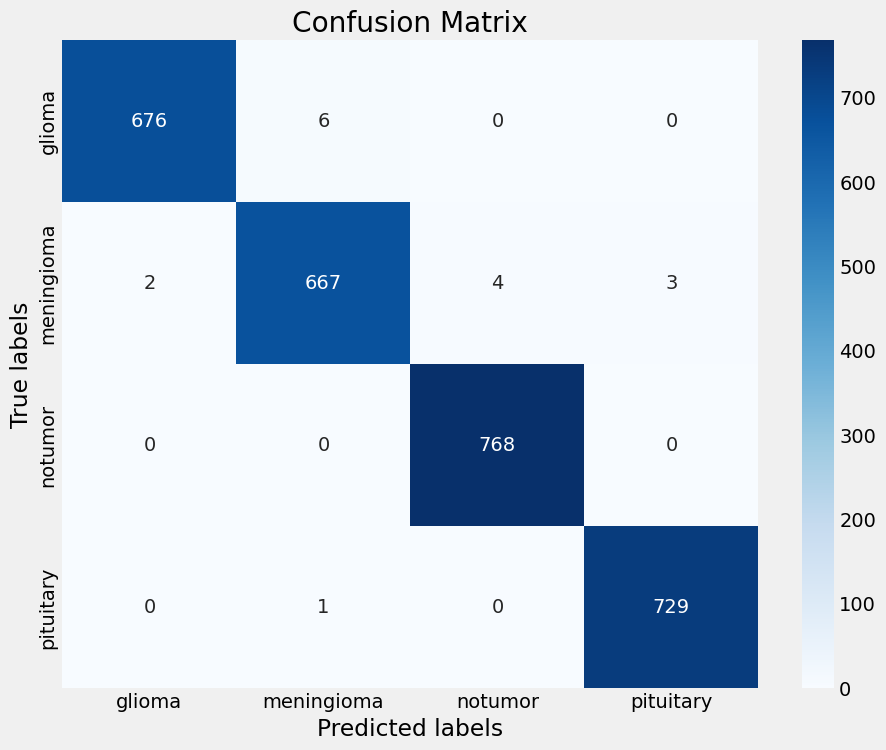

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get class labels
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Calculate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix with color design
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [27]:
model.save('Brain_Tumor.h5')

c:\Users\Ganeshvivek Mannam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predicting with model

In [28]:
loaded_model = tf.keras.models.load_model('Brain_Tumor.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [29]:
image_path = "D:\Brain tumor dataset 2023\Testing\glioma\Te-gl_0012.jpg"
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
print(f"{class_labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 365ms/step
Meningioma
